Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

In [1]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset and Information

In [2]:
df=pd.read_csv('file2.csv')

In [3]:
df.head()

,Unnamed: 0,Airlines name,Departure,Stops,Duration,Arrival,Price
0,0,SpiceJet,06:10,1 stop via Jaipur,04 h 20 m,10:30,3680.0
1,1,AirAsia,15:15,1 stop via Jaipur,07 h 50 m,23:05,4546.0
2,2,AirAsia,19:40,1 stop via Bengaluru,05 h 45 m,01:25,4546.0
3,3,AirAsia,21:50,1 stop via Bengaluru,16 h 30 m,14:20,4546.0
4,4,Vistara,21:55,Non stop,02 h 15 m,00:10,4652.0


In [4]:
df.shape

(228, 7)

In [5]:
df.isnull().sum()

Unnamed: 0       0
Airlines name    0
Departure        0
Stops            0
Duration         0
Arrival          0
Price            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     228 non-null    int64  
 1   Airlines name  228 non-null    object 
 2   Departure      228 non-null    object 
 3   Stops          228 non-null    object 
 4   Duration       228 non-null    object 
 5   Arrival        228 non-null    object 
 6   Price          228 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 12.6+ KB


#### Price are floating data columns; unnamed: 0,year are integer data type columns,Airlines name,departure, stops, Duration,Arrival, are object data type column. There are 228 Rows and 7 Columns in Data Set.target is price ,Airlines name,departure, stops, Duration,Arrival,are features. All are continous/numeric and categorical data

In [7]:
df.describe(include='all')

,Unnamed: 0,Airlines name,Departure,Stops,Duration,Arrival,Price
count,228.00000,228,228,228,228,228,228.000000
unique,NaN,7,147,26,82,142,NaN
top,NaN,IndiGo,07:00,Non stop,02 h 15 m,07:05,NaN
freq,NaN,101,8,117,25,11,NaN
mean,113.50000,NaN,NaN,NaN,NaN,NaN,6473.140351
std,65.96211,NaN,NaN,NaN,NaN,NaN,2636.902284
min,0.00000,NaN,NaN,NaN,NaN,NaN,2252.000000
25%,56.75000,NaN,NaN,NaN,NaN,NaN,5104.000000
50%,113.50000,NaN,NaN,NaN,NaN,NaN,6367.000000
75%,170.25000,NaN,NaN,NaN,NaN,NaN,7636.250000


In [8]:
df['Price'].nunique()

128

In [9]:
df.loc[df['Price']== " "]

,Unnamed: 0,Airlines name,Departure,Stops,Duration,Arrival,Price


In [10]:
df.loc[:,"Price"]

0       3680.0
1       4546.0
2       4546.0
3       4546.0
4       4652.0
        ...   
223     7518.0
224     7676.0
225     9146.0
226     9146.0
227    10014.0
Name: Price, Length: 228, dtype: float64

In [11]:
df["Duration"].value_counts()

02 h 15 m    25
01 h 45 m    17
02 h 25 m    12
02 h 20 m    12
02 h 10 m    11
             ..
11 h 15 m     1
06 h 25 m     1
08 h 25 m     1
13 h 45 m     1
03 h 30 m     1
Name: Duration, Length: 82, dtype: int64

## EDA

In [13]:
# Departure time is when a plane leaves the gate. 

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Departure"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Departure"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Departure"], axis = 1, inplace = True)

In [14]:
df.head(3)

,Unnamed: 0,Airlines name,Stops,Duration,Arrival,Price,Dep_hour,Dep_min
0,0,SpiceJet,1 stop via Jaipur,04 h 20 m,10:30,3680.0,6,10
1,1,AirAsia,1 stop via Jaipur,07 h 50 m,23:05,4546.0,15,15
2,2,AirAsia,1 stop via Bengaluru,05 h 45 m,01:25,4546.0,19,40


In [15]:
# Arrival time is when the plane pulls up to the gate.

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival"], axis = 1, inplace = True)

In [16]:
df.head(3)

,Unnamed: 0,Airlines name,Stops,Duration,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,SpiceJet,1 stop via Jaipur,04 h 20 m,3680.0,6,10,10,30
1,1,AirAsia,1 stop via Jaipur,07 h 50 m,4546.0,15,15,23,5
2,2,AirAsia,1 stop via Bengaluru,05 h 45 m,4546.0,19,40,1,25


In [38]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()):   # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration            

In [39]:
# Adding Duration column to test set
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [40]:
df.head(3)

,Unnamed: 0,Airlines name,Stops,Duration,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,SpiceJet,1 stop via Jaipur,04 h 20 m,3680.0,6,10,10,30,4,20
1,1,AirAsia,1 stop via Jaipur,07 h 50 m,4546.0,15,15,23,5,7,50
2,2,AirAsia,1 stop via Bengaluru,05 h 45 m,4546.0,19,40,1,25,5,45


In [41]:
df.drop(["Duration"], axis = 1, inplace = True)

In [42]:
df.head(2)

,Unnamed: 0,Airlines name,Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,SpiceJet,1 stop via Jaipur,3680.0,6,10,10,30,4,20
1,1,AirAsia,1 stop via Jaipur,4546.0,15,15,23,5,7,50


In [43]:
df["Airlines name"].value_counts()

IndiGo       101
Vistara       37
Air India     36
AirAsia       23
Go First      14
SpiceJet       9
Akasa Air      8
Name: Airlines name, dtype: int64

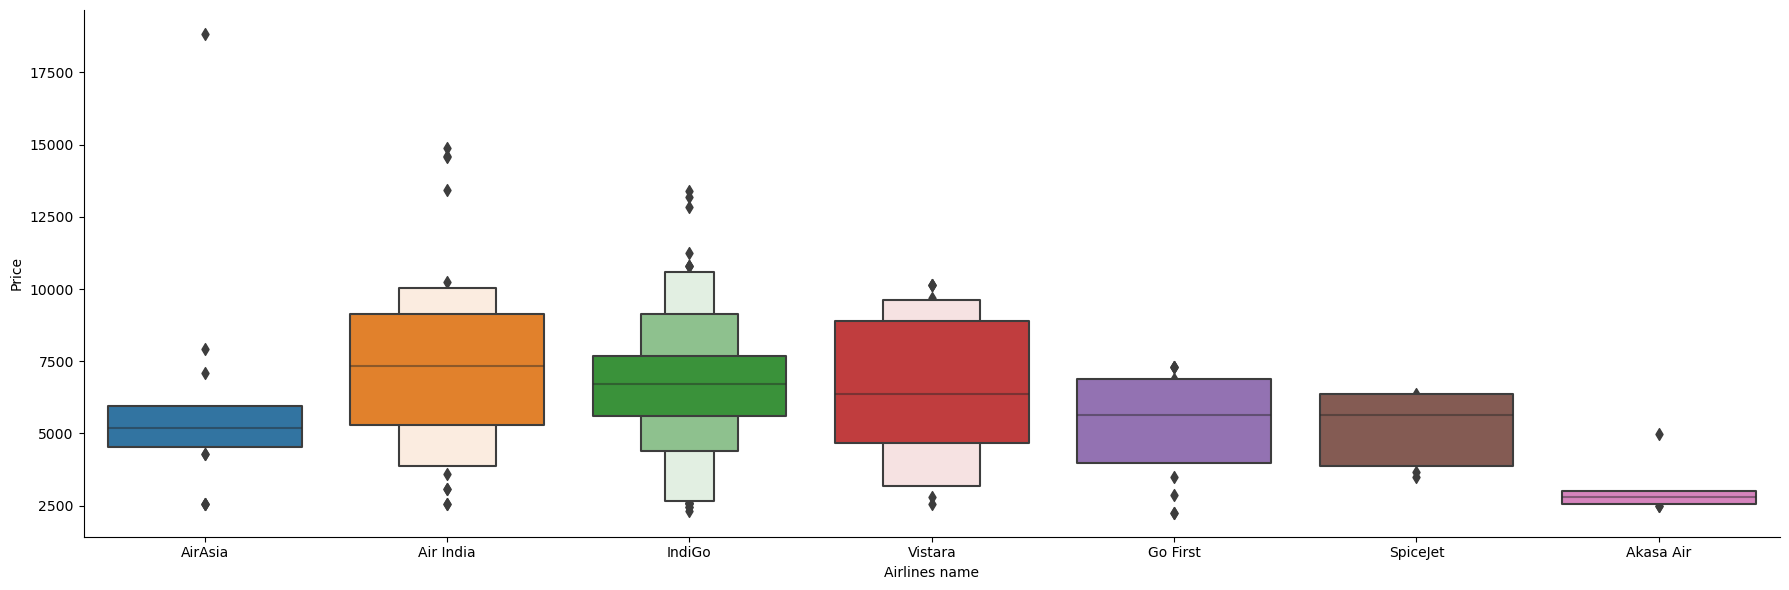

In [45]:
# From graph we can see that Indigo Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airlines name", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [47]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline_name = df[["Airlines name"]]

Airline_name = pd.get_dummies(Airline_name, drop_first= True)

Airline_name.head()

,Airlines name_AirAsia,Airlines name_Akasa Air,Airlines name_Go First,Airlines name_IndiGo,Airlines name_SpiceJet,Airlines name_Vistara
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [48]:
df["Stops"].value_counts()

Non stop                       117
1 stop via Bengaluru            15
1 stop via Ahmedabad            13
1 stop via Goa                  13
1 stop via Chennai              10
1 stop via Hyderabad             9
1 stop via Indore                8
1 stop via Mumbai                7
1 stop via Lucknow               7
1 stop via Jaipur                6
1 stop via Udaipur               5
1 stop via Bhopal                2
1 stop via Vadodara              2
1 stop via Raipur                2
2 stop via Indore,Mumbai         1
2 stop via Chennai,Mumbai        1
2 stop via Hyderabad,Mumbai      1
2 stop via Goa,Mumbai            1
1 stop via Aurangabad            1
1 stop via Nasik                 1
1 stop via Shirdi                1
1 stop via Jharsuguda            1
1 stop via Nagpur                1
1 stop via Ranchi                1
1 stop via Mangalore             1
2 stop via Bengaluru,Mumbai      1
Name: Stops, dtype: int64

In [49]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Stops']= label_encoder.fit_transform(df['Stops'])

In [50]:
df.head(3)

,Unnamed: 0,Airlines name,Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,SpiceJet,8,3680.0,6,10,10,30,4,20
1,1,AirAsia,8,4546.0,15,15,23,5,7,50
2,2,AirAsia,2,4546.0,19,40,1,25,5,45


In [51]:
# Concatenate dataframe --> df + Airlines_name 

data = pd.concat([df, Airline_name], axis = 1)

In [52]:
data.head()

,Unnamed: 0,Airlines name,Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airlines name_AirAsia,Airlines name_Akasa Air,Airlines name_Go First,Airlines name_IndiGo,Airlines name_SpiceJet,Airlines name_Vistara
0,0,SpiceJet,8,3680.0,6,10,10,30,4,20,0,0,0,0,1,0
1,1,AirAsia,8,4546.0,15,15,23,5,7,50,1,0,0,0,0,0
2,2,AirAsia,2,4546.0,19,40,1,25,5,45,1,0,0,0,0,0
3,3,AirAsia,2,4546.0,21,50,14,20,16,30,1,0,0,0,0,0
4,4,Vistara,25,4652.0,21,55,0,10,2,15,0,0,0,0,0,1


In [54]:
data.drop(["Airlines name"], axis = 1, inplace = True)

In [55]:
data.head()

,Unnamed: 0,Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airlines name_AirAsia,Airlines name_Akasa Air,Airlines name_Go First,Airlines name_IndiGo,Airlines name_SpiceJet,Airlines name_Vistara
0,0,8,3680.0,6,10,10,30,4,20,0,0,0,0,1,0
1,1,8,4546.0,15,15,23,5,7,50,1,0,0,0,0,0
2,2,2,4546.0,19,40,1,25,5,45,1,0,0,0,0,0
3,3,2,4546.0,21,50,14,20,16,30,1,0,0,0,0,0
4,4,25,4652.0,21,55,0,10,2,15,0,0,0,0,0,1


In [58]:
data.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [59]:
data.shape

(228, 14)

## Data Visualization

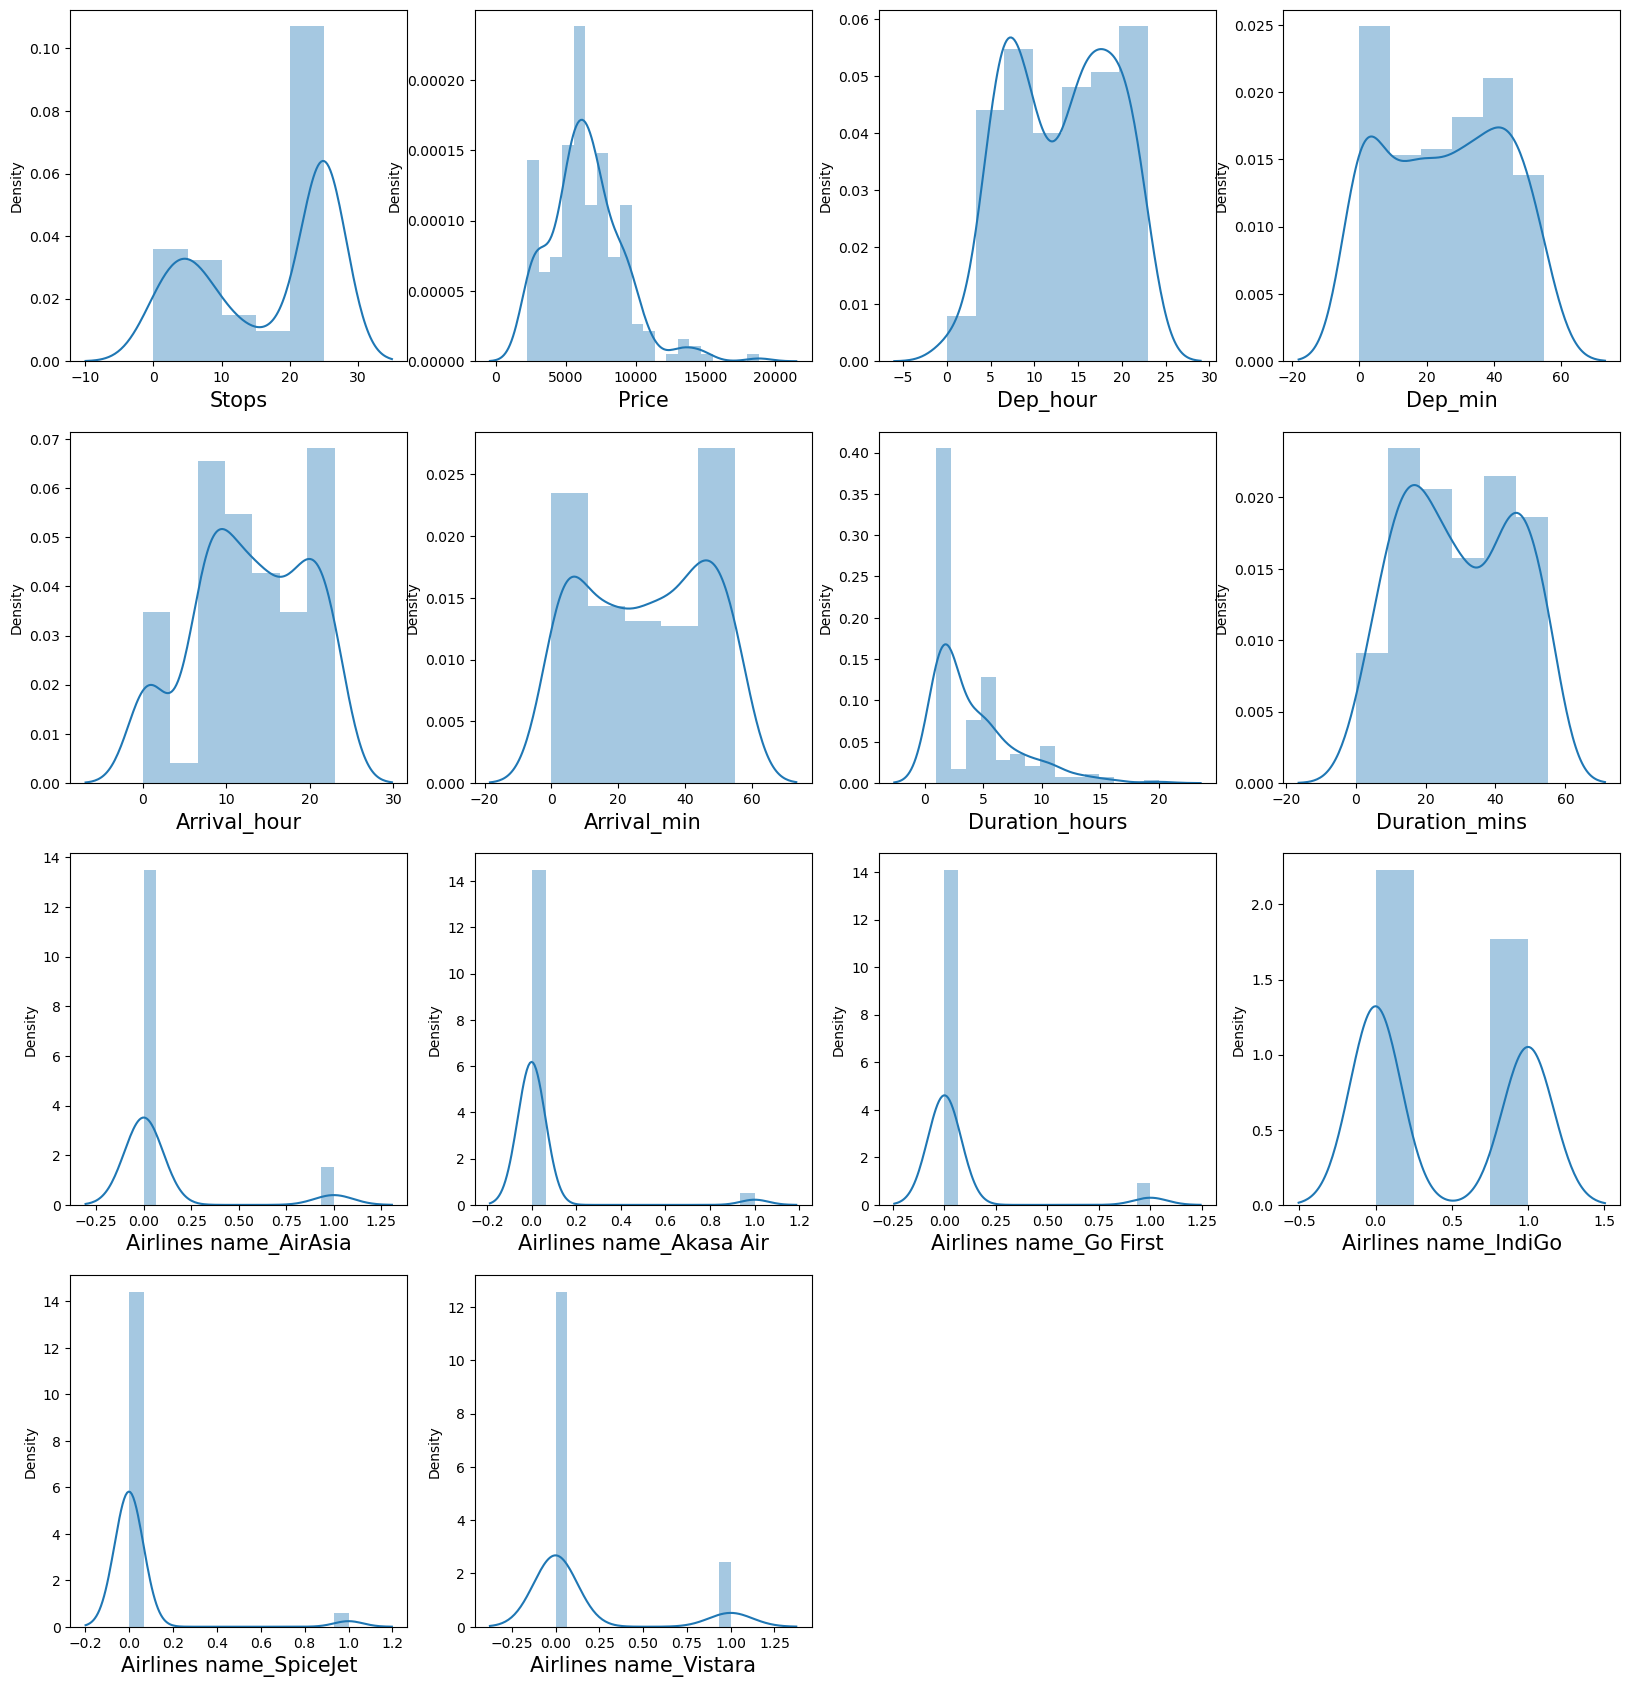

In [60]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='white')
plotnum = 1

for col in data:
    if plotnum<=15:
        plt.subplot(4,4,plotnum)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

## Pair plot

<Figure size 1500x1000 with 0 Axes>

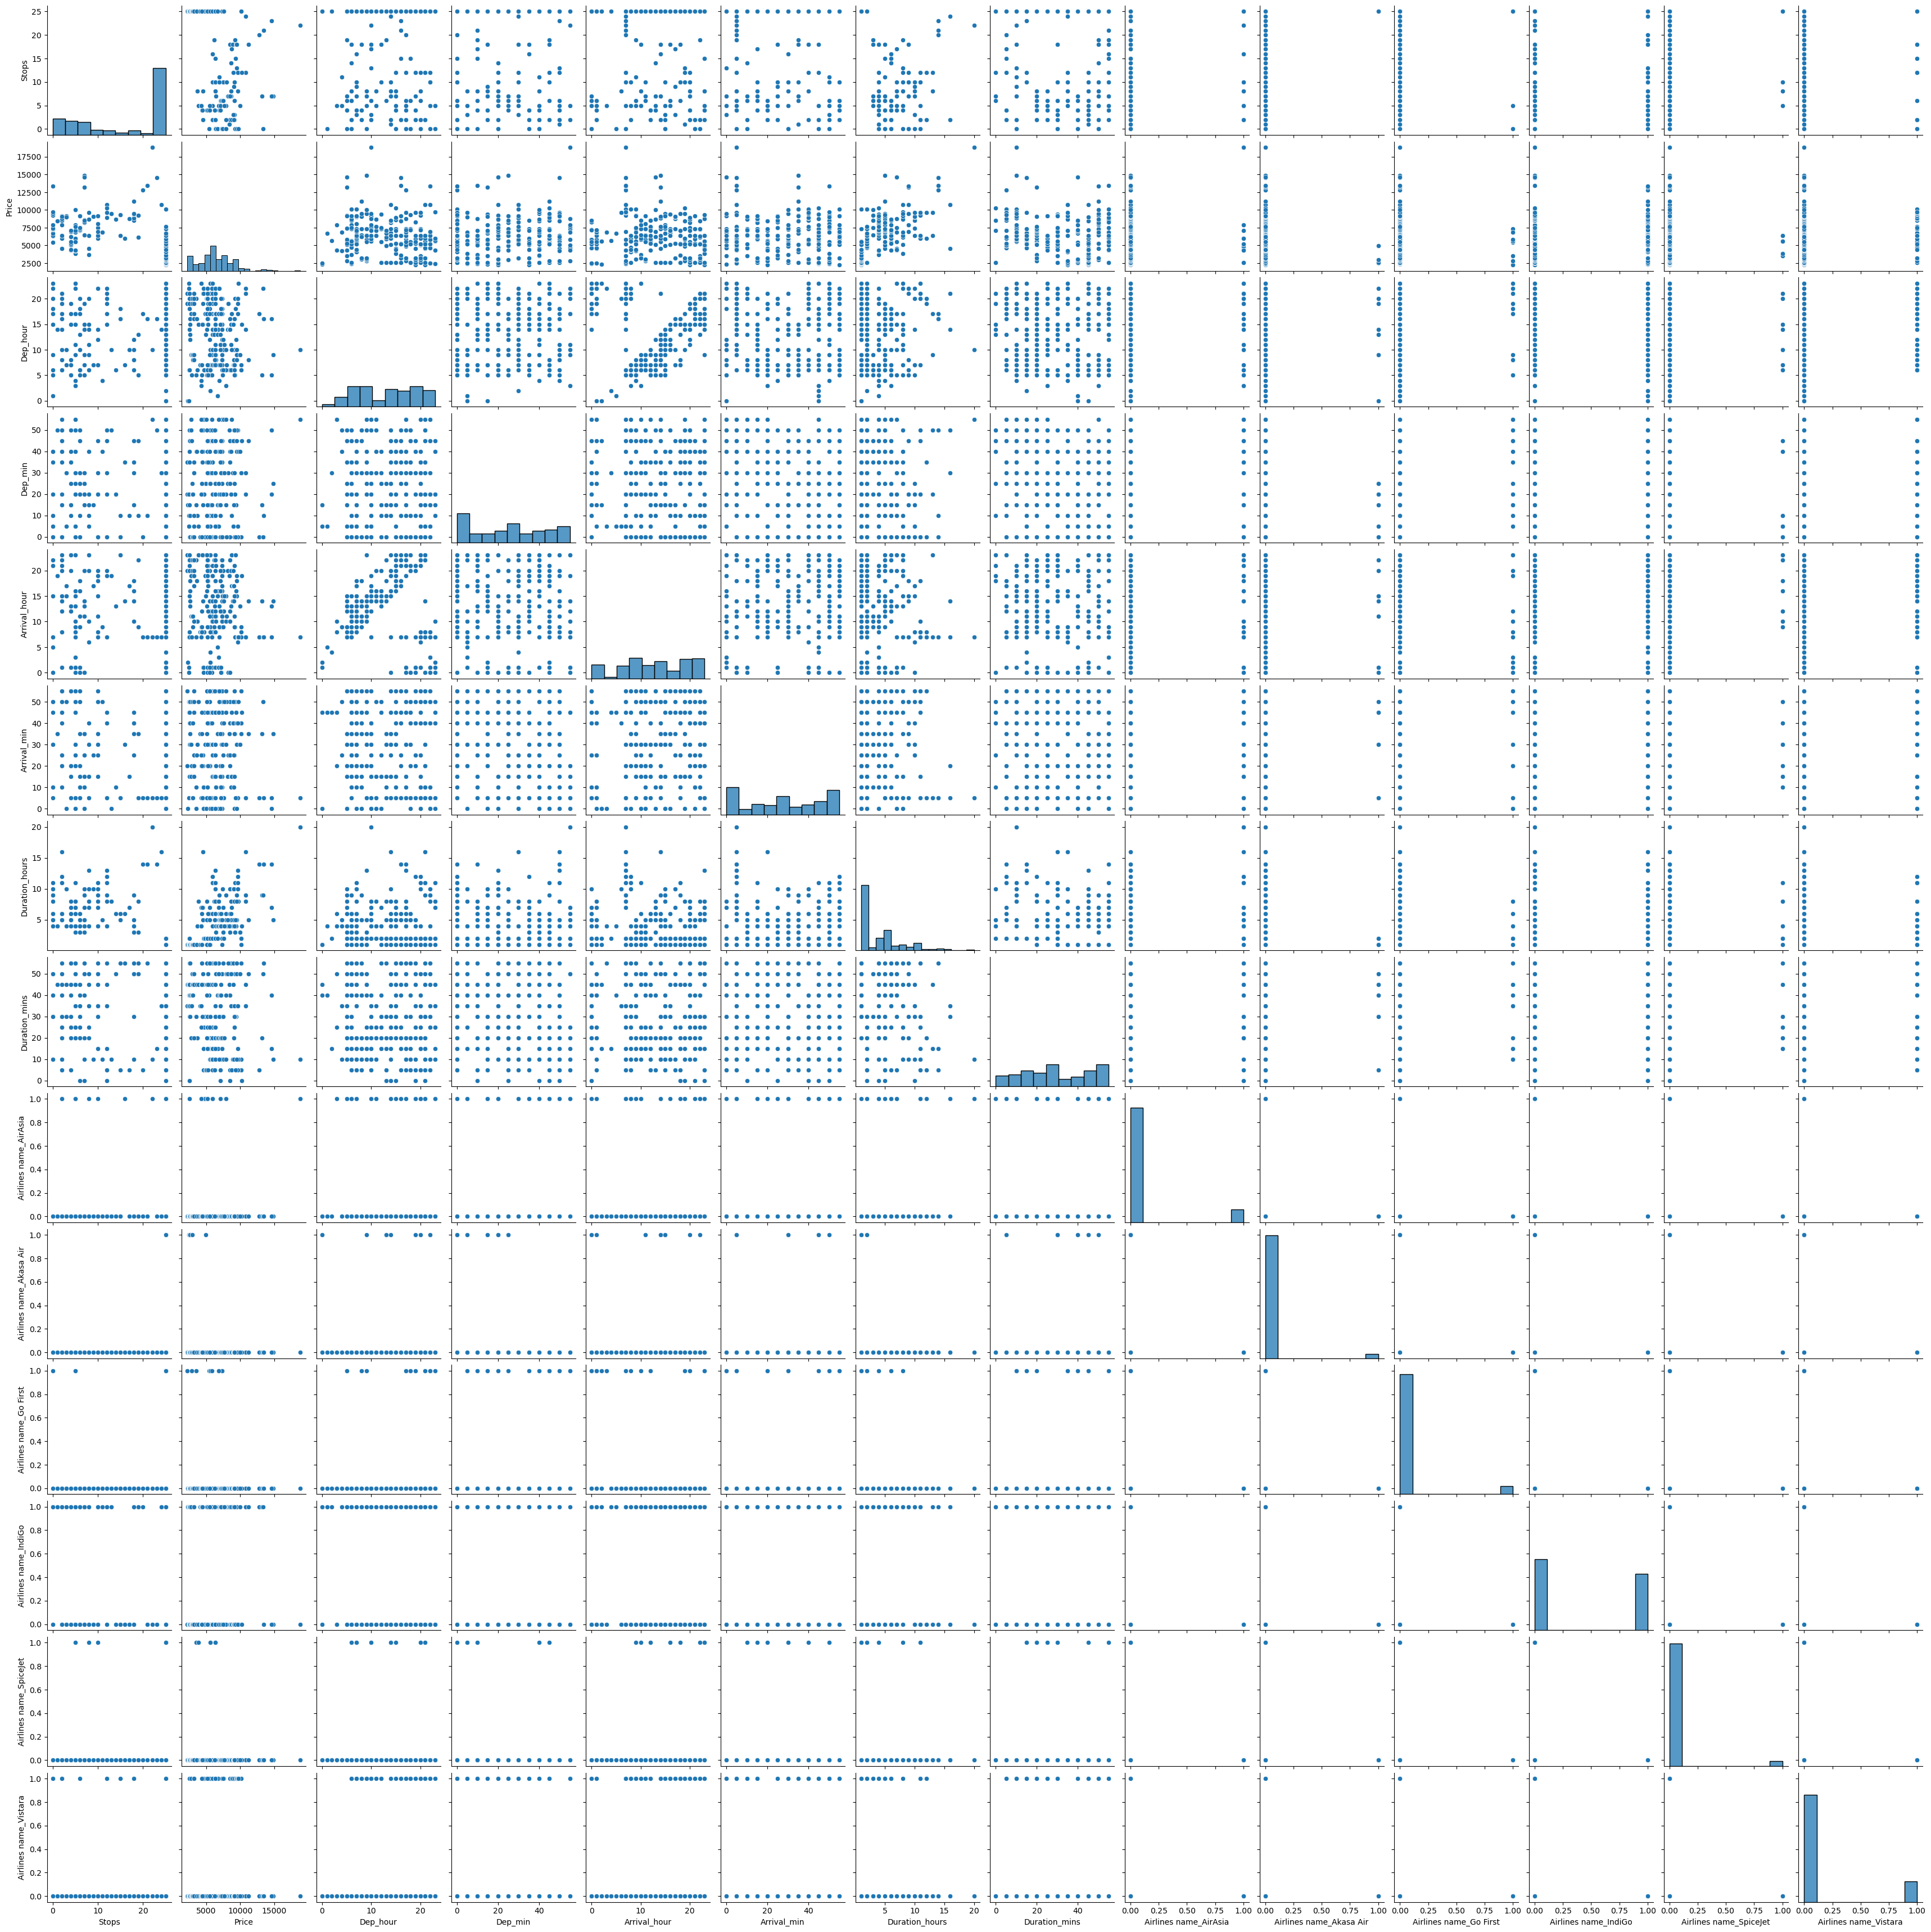

In [61]:
plt.figure(figsize=(15,10))
sns.pairplot(data)
plt.show()

## Box plot

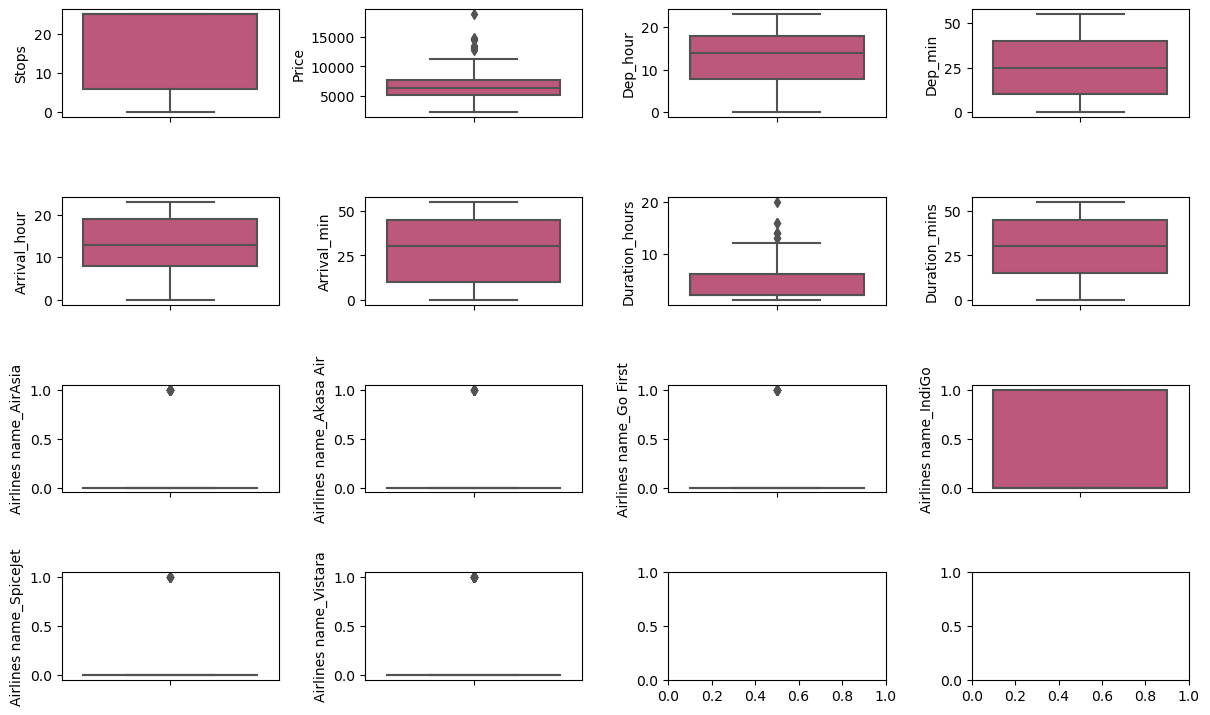

In [63]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

### there is no outliers present in this dataset

## Distribution plot

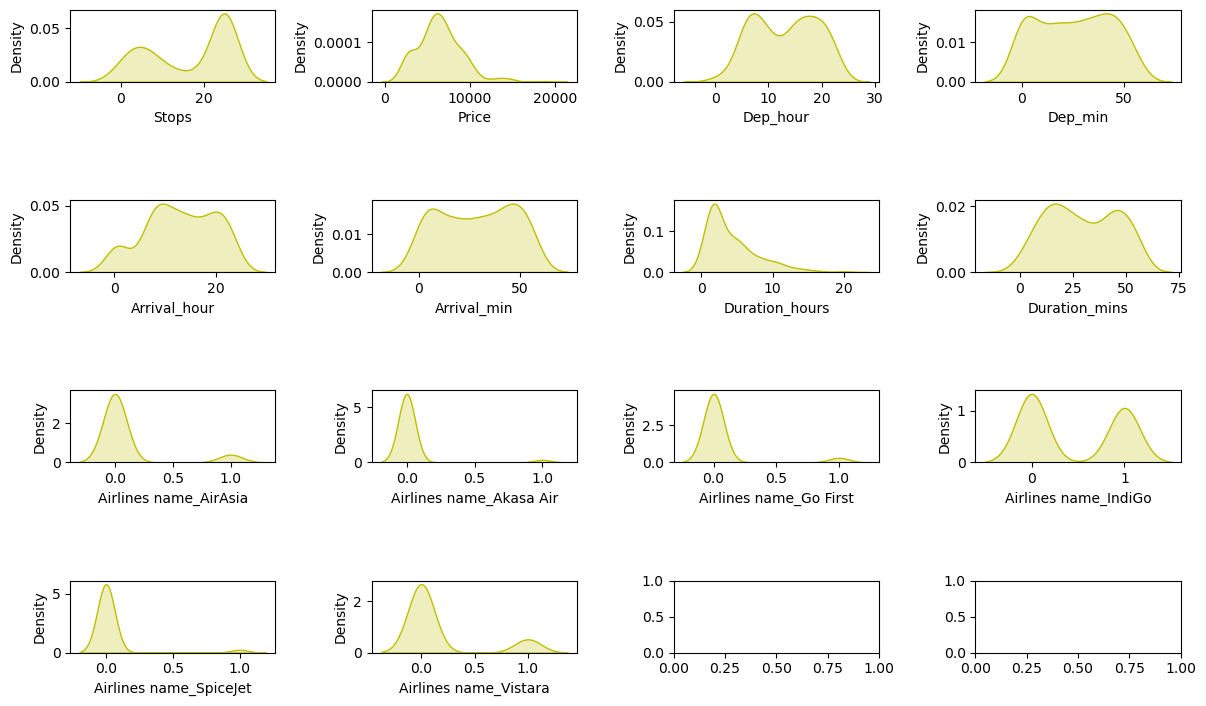

In [64]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in data.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

## check skewness and outliers and correlation b/w target and features

In [65]:
data.corr()['Price'].sort_values()

Stops                     -0.375859
Airlines name_Akasa Air   -0.250442
Duration_mins             -0.163501
Arrival_min               -0.120364
Airlines name_Go First    -0.110821
Airlines name_AirAsia     -0.109894
Dep_hour                  -0.107534
Airlines name_SpiceJet    -0.096004
Arrival_hour              -0.092514
Airlines name_Vistara      0.026140
Dep_min                    0.046346
Airlines name_IndiGo       0.096865
Duration_hours             0.596105
Price                      1.000000
Name: Price, dtype: float64

## Heat map

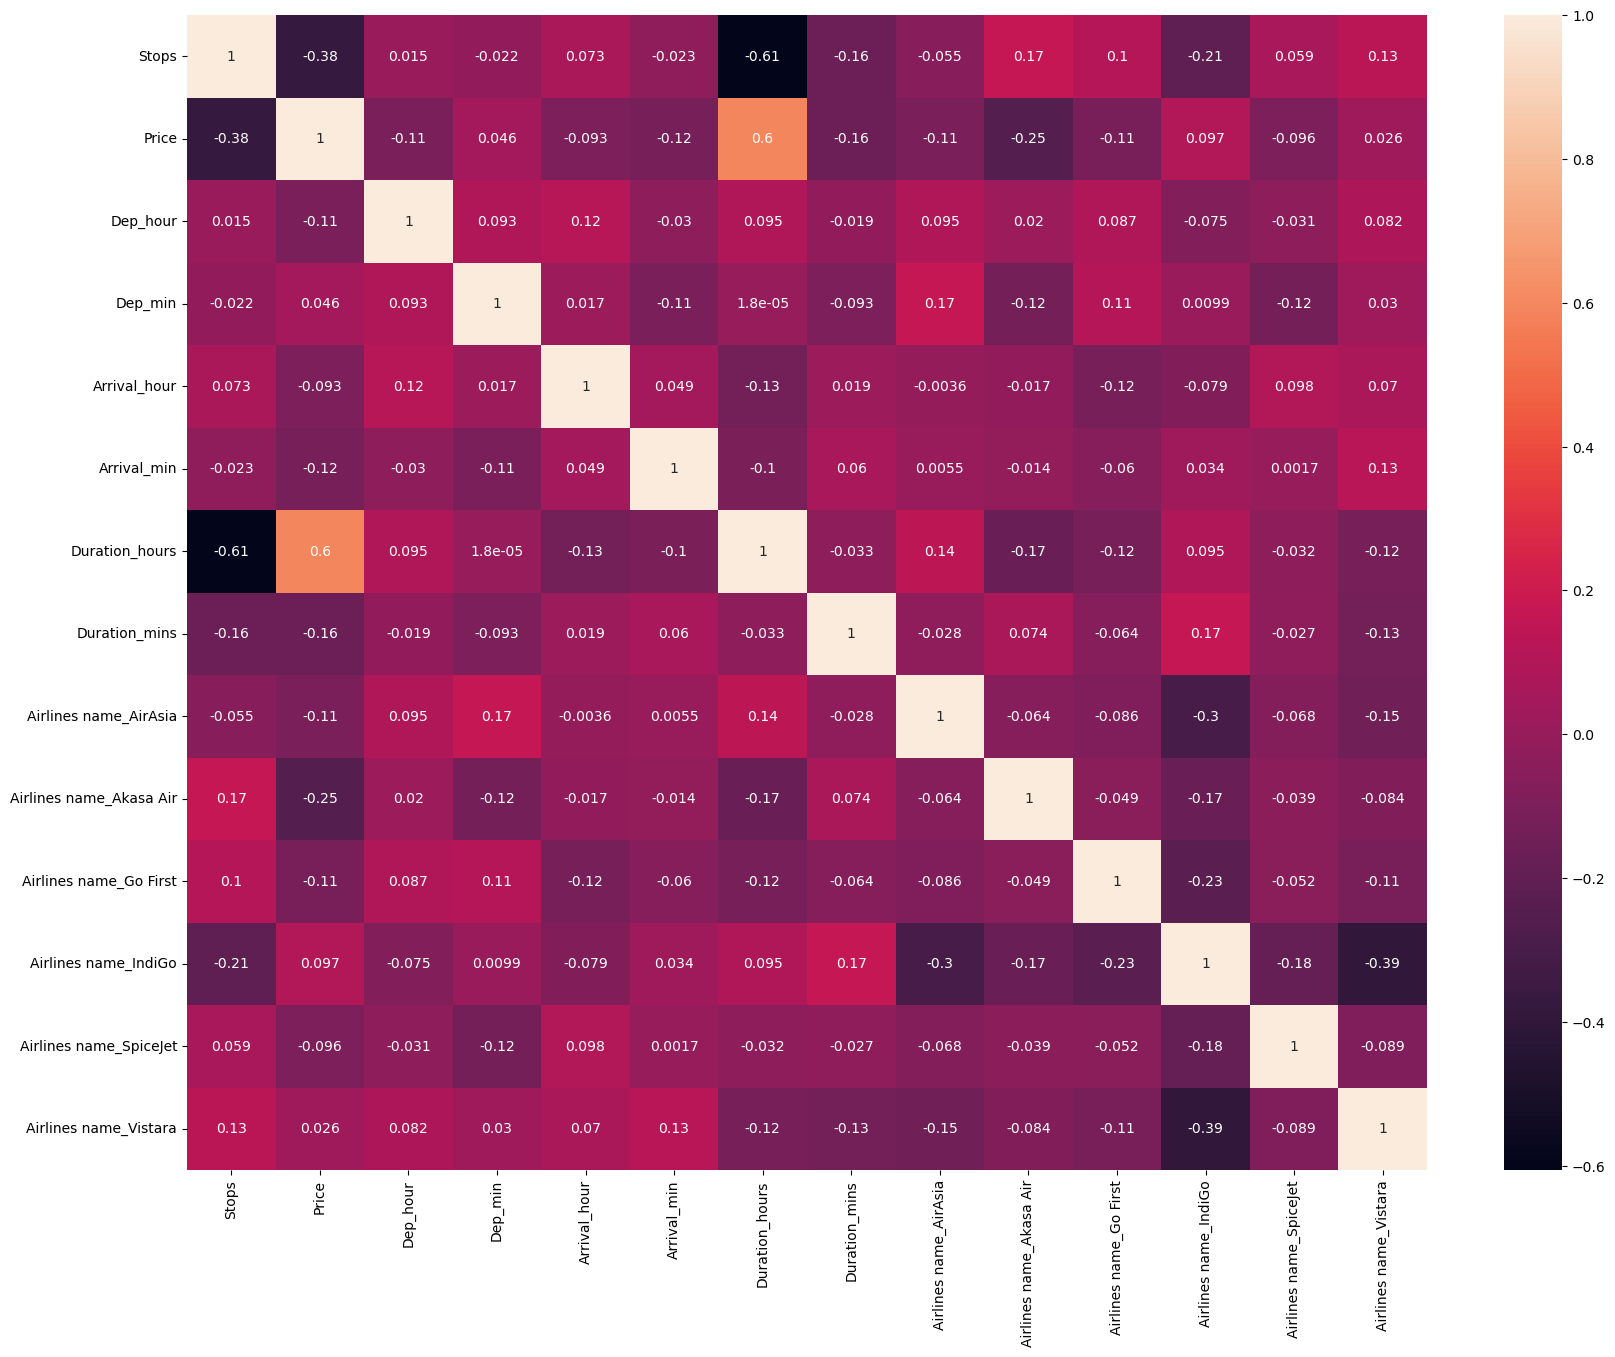

In [66]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)
plt.show()

##### Price is highly correlated with duration hours

## Line plot

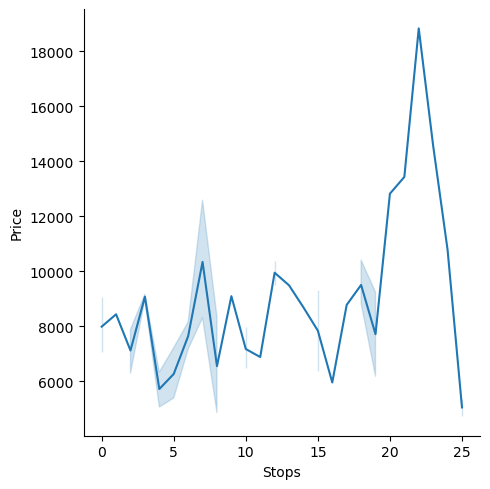

In [67]:
sns.relplot(x="Stops", y="Price", kind="line", data=data)

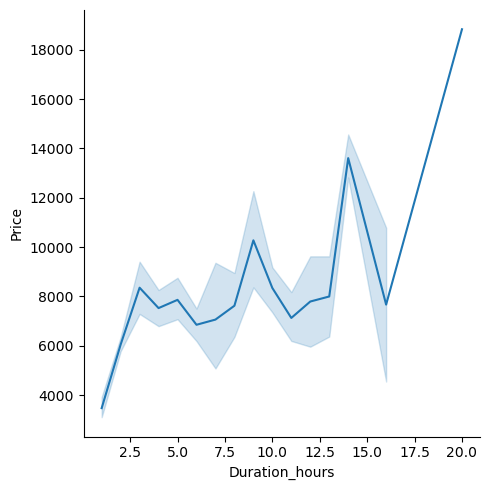

In [68]:
sns.relplot(x="Duration_hours", y="Price", kind="line", data=df)

In [69]:
data.skew()

Stops                     -0.437175
Price                      0.953689
Dep_hour                  -0.069305
Dep_min                   -0.006917
Arrival_hour              -0.231943
Arrival_min               -0.053364
Duration_hours             1.485997
Duration_mins              0.042361
Airlines name_AirAsia      2.668102
Airlines name_Akasa Air    5.086879
Airlines name_Go First     3.678163
Airlines name_IndiGo       0.231091
Airlines name_SpiceJet     4.761545
Airlines name_Vistara      1.844060
dtype: float64

In [70]:
X = data.drop("Price",axis=1)
Y = data["Price"]

## Creating Train And Test dataset

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [72]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [73]:
Y_pred = reg_rf.predict(X_test)

In [74]:
reg_rf.score(X_train, Y_train)

0.9330918955165518

In [75]:
reg_rf.score(X_test, Y_test)

0.7438138328043259

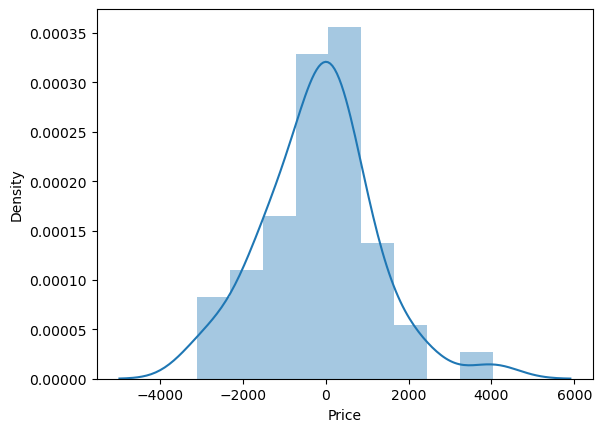

In [76]:
sns.distplot(Y_test-Y_pred)
plt.show()

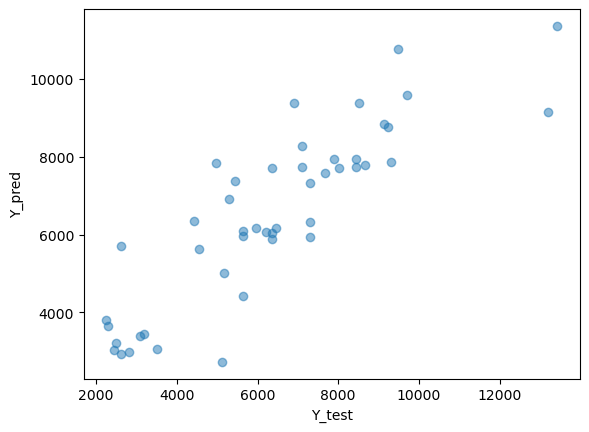

In [77]:
plt.scatter(Y_test, Y_pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [79]:
from sklearn import metrics

In [80]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 987.0834782608697
MSE: 1787556.7398130433
RMSE: 1336.9954150306737


In [82]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(Y)-min(Y))

0.12609632064660115

In [83]:
metrics.r2_score(Y_test, Y_pred)

0.7438138328043259

## Hyperparameter Tuning

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [86]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [87]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [88]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [90]:
prediction = rf_random.predict(X_test)

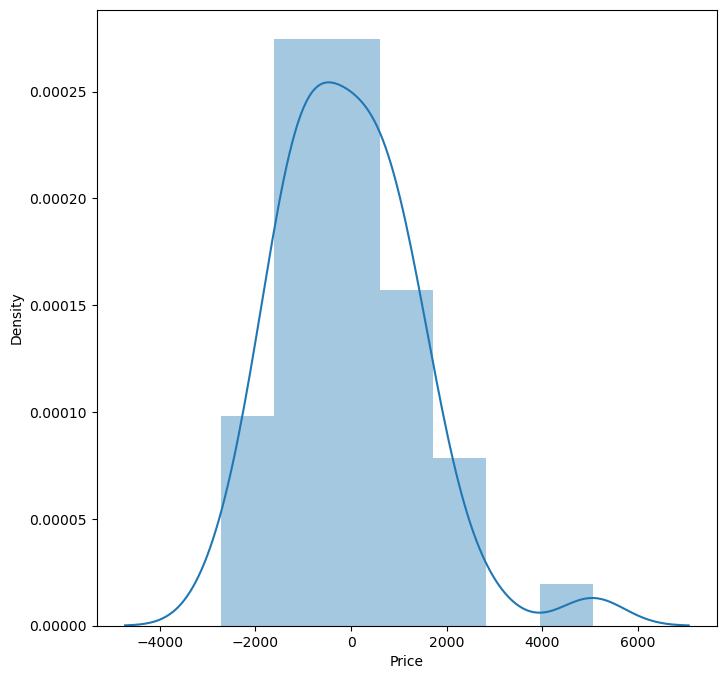

In [91]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()

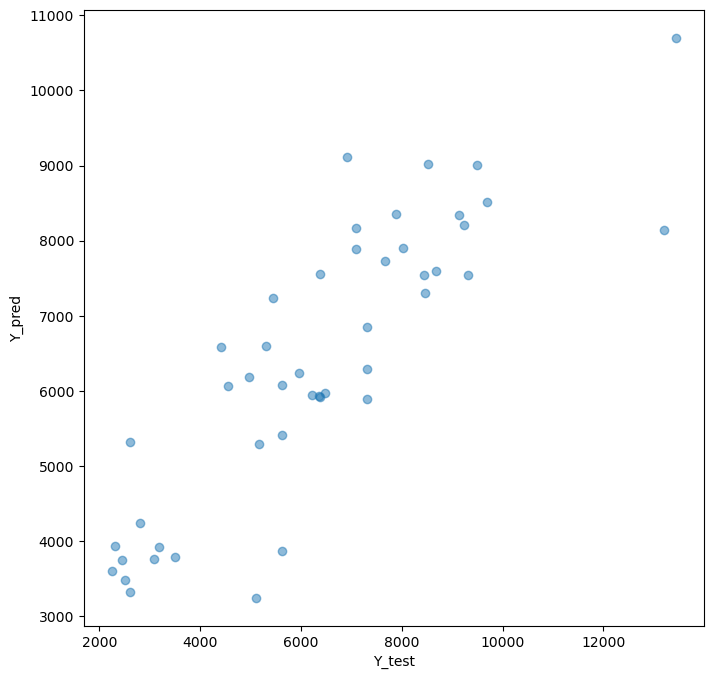

In [92]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [93]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1121.4490434782608
MSE: 2033232.7709380868
RMSE: 1425.914713767302


## Save the file for future use

In [94]:
filename = "rfrandom.pkl"
joblib.dump(rf_random, filename)

['rfrandom.pkl']